<a href="https://colab.research.google.com/github/eggywardani/machine-learning-starter/blob/main/machine_learning_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Eggy Andika Wardani

Email : eggyandikawardani@gmail.com

Domisili : Kabupaten Kudus


In [131]:
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
  

--2020-10-14 06:48:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.59MB/s    in 30s     

2020-10-14 06:49:02 (10.4 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [132]:
import zipfile, os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('temp')
zip_ref.close()

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

splitfolders.ratio('temp/rockpaperscissors/rps-cv-images', 'temp/rockpaperscissors', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3711.50 files/s]


In [133]:
base_dir = 'temp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [120]:
os.listdir('temp/rockpaperscissors/train')

['paper', 'rock', 'scissors']

In [119]:
os.listdir('temp/rockpaperscissors/val')

['paper', 'rock', 'scissors']

In [134]:
train_rock_dir, val_rock_dir = train_test_split (os.listdir(rock_dir), test_size=0.2)
train_paper_dir, val_paper_dir = train_test_split (os.listdir(paper_dir), test_size=0.2)
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir(scissors_dir), test_size=0.2)


In [122]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [135]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [124]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [136]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [130]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5)

Epoch 1/20
25/25 [==============================] - 40s 2s/step - loss: 0.4737 - accuracy: 0.8288 - val_loss: 0.2799 - val_accuracy: 0.8875
Epoch 2/20
25/25 [==============================] - 40s 2s/step - loss: 0.2483 - accuracy: 0.9200 - val_loss: 0.2049 - val_accuracy: 0.9250
Epoch 3/20
25/25 [==============================] - 40s 2s/step - loss: 0.2157 - accuracy: 0.9300 - val_loss: 0.3569 - val_accuracy: 0.8938
Epoch 4/20
25/25 [==============================] - 40s 2s/step - loss: 0.2156 - accuracy: 0.9275 - val_loss: 0.1755 - val_accuracy: 0.9438
Epoch 5/20
25/25 [==============================] - 40s 2s/step - loss: 0.1704 - accuracy: 0.9388 - val_loss: 0.1100 - val_accuracy: 0.9688
Epoch 6/20
25/25 [==============================] - 40s 2s/step - loss: 0.1486 - accuracy: 0.9463 - val_loss: 0.1582 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 40s 2s/step - loss: 0.1247 - accuracy: 0.9625 - val_loss: 0.2003 - val_accuracy: 0.9563
Epoch 8/20
25/25 [==

Saving 8ei3rSl89D6W8Tav.png to 8ei3rSl89D6W8Tav.png
8ei3rSl89D6W8Tav.png
Scissors


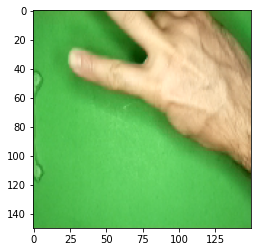

In [138]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
    print('Paper')
  elif classes[0,1]==1:
    print('Rock')
  elif classes[0,2]==1:
    print('Scissors')